In [3]:
import numpy as np
import pandas as pd
import librosa
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier
import matplotlib.pyplot as plt
import soundfile as sf
from sklearn.metrics import classification_report
from keras.models import Sequential
from keras.utils  import to_categorical
from keras.layers import  Dense, Conv2D,Flatten,MaxPooling2D,Dropout
from sklearn.svm import NuSVC
from sklearn.svm import SVC

Using TensorFlow backend.


In [4]:
y = []
X = []; 
yp = []; 
new_X = []
new_X_mel =[]
yp_mel=[]

In [5]:
path = 'C:/Users/clyde/Documents/Thinkful/Pre Data Science Bootcamp/Sound Classification Datbase/Train/'
df = pd.read_csv('C:/Users/clyde/Documents/Thinkful/Pre Data Science Bootcamp/Sound Classification Datbase/train.csv')
class_label = df.Class.unique().tolist()

In [4]:
i=1

In [5]:
[y,sr] = sf.read('C:/Users/clyde/Documents/Thinkful/Pre Data Science Bootcamp/Sound Classification Datbase/Train/%d.wav'%i)

In [6]:
zz = librosa.feature.melspectrogram(y=y, sr=sr,S=None, n_fft=2048, hop_length=1510)

In [7]:
S = librosa.feature.inverse.mel_to_stft(zz)
y = librosa.griffinlim(S)

In [8]:
import IPython.display as ipd
ipd.Audio(y,rate=sr)

In [11]:
librosa.feature.inverse.mfcc_to_audio(zz, n_mels=128, dct_type=2, norm='ortho', ref=1.0)

array([15809.936 , 15787.592 , 15768.905 , ...,  1401.3564,  1418.318 ,
        1432.3749], dtype=float32)

In [12]:
q = librosa.istft(S)

In [13]:
ipd.Audio(q,rate=sr)

In [14]:
zzz=librosa.feature.inverse.mel_to_audio(zz, sr=sr, n_fft=2048, hop_length=1510)

In [15]:
ipd.Audio(zzz,rate=sr)

In [55]:
[y,sr] = sf.read('C:/Users/clyde/Documents/Thinkful/Pre Data Science Bootcamp/Sound Classification Datbase/Train/%d.wav'%3)
ipd.Audio(y[:,1],rate=sr)

In [51]:
y[:,1]

array([-0.00198364, -0.00192261, -0.00210571, ...,  0.01861572,
        0.15274048,  0.12020874])

In [107]:
import IPython.display as ipd
n = len(y[0:89999])
hl = 353
n_fft = 511
y_pad = librosa.util.fix_length(y[:,1], n + n_fft // 2)
D = librosa.stft(y_pad, n_fft=n_fft,hop_length=hl)
y_out = librosa.istft(D,length=n,hop_length=hl)
ipd.Audio(y_out,rate=sr)


In [108]:
D.shape,n

((256, 256), 89999)

In [72]:
y_pad

array([ 0.03317261,  0.08050537,  0.0947876 , ..., -0.01226807,
       -0.01998901, -0.03671265])

C:\Users\clyde\Anaconda3\envs\dask-scipy\lib\site-packages\librosa\display.py:709: UserWarning: Trying to display complex-valued input. Showing magnitude instead.
  warnings.warn('Trying to display complex-valued input. '


Text(0.5, 1.0, 'Linear-frequency power spectrogram')

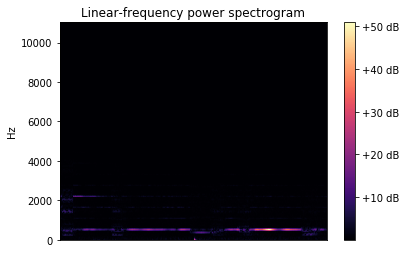

In [57]:
from librosa import display
DD = librosa.amplitude_to_db(np.abs(D), ref=np.max)
plt.subplot(1, 1, 1)
librosa.display.specshow(D, y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.title('Linear-frequency power spectrogram')

In [35]:
from librosa import display


Text(0.5, 1.0, 'Linear-frequency power spectrogram')

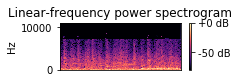

In [83]:
>>> DD = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
>>> plt.subplot(4, 2, 1)
>>> librosa.display.specshow(DD, y_axis='linear')
>>> plt.colorbar(format='%+2.0f dB')
>>> plt.title('Linear-frequency power spectrogram')

In [79]:
def extract_features(window_size,n,hl,n_fft):

    for i in df.ID[0:20]:
        try:
            [y,sr] = sf.read('C:/Users/clyde/Documents/Thinkful/Pre Data Science Bootcamp/Sound Classification Datbase/Train/%d.wav'%i)
            if   y.ndim ==2 and len(y) < window_size:
                continue
                
            elif y.ndim == 2 and len(y)>=window_size:
                y= y[:,1].T[0:window_size] 
                y_pad = librosa.util.fix_length(y, n + n_fft // 2)
                print(len(y))
                
            elif y.ndim ==1 and len(y)<window_size:
                continue
            
            else:
                y = y[0:window_size]
                y_pad = librosa.util.fix_length(y, n + n_fft // 2)
                print(len(y))
            print(y)
            mfccs1 = librosa.stft(y_pad, n_fft=n_fft,hop_length=hl)
            yp_mel.append(idx)
            new_X_mel.append(mfccs1)
            print(new_X_mel)
        except:
            #print('%d.wav'%i)
            pass
    return new_X_mel,yp_mel

In [80]:
new_X_mel,yp_mel = extract_features(window_size = 89999,n=89999,hl = 353,n_fft = 511)

89999
89999
89999
89999
89999
89999
89999
89999
89999
89999
89999
89999
89999
89999
89999
89999
89999
89999
89999


In [47]:
extract_features(window_size = 89999,n=89999,hl = 353,n_fft = 511)

0.wav
1.wav
2.wav
3.wav
4.wav
6.wav
10.wav
11.wav
15.wav
17.wav
18.wav
19.wav
20.wav
22.wav
24.wav
26.wav
27.wav
32.wav
33.wav


([], [])

In [121]:
new_X[1].shape

(128,)

In [61]:
new_X_mel

[]

In [ ]:
np.shape(new_X_mel)

In [66]:
a = np.arange(1,10)

In [68]:
a = [a]

In [69]:
a.append(a)

In [70]:
a

[array([1, 2, 3, 4, 5, 6, 7, 8, 9]), [...]]

In [71]:
a

[array([1, 2, 3, 4, 5, 6, 7, 8, 9]), [...]]

In [72]:
a = [1,2,3,4,5]

In [73]:
a.append(a)

In [74]:
a

[1, 2, 3, 4, 5, [...]]

In [75]:
a[1]

2

In [76]:
b =[1,2,3]

In [77]:
b.append([4,5,6])

In [78]:
b

[1, 2, 3, [4, 5, 6]]